In [5]:
import json
import os
import numpy as np 
import pandas as pd 
import json
import csv
import torch
import torchvision.transforms as transforms
from PIL import Image
from transformers import BertTokenizer
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
def load_Data(input):
    with open(input, 'r') as f:
        data = json.load(f)
    return data    

In [5]:
print(type(dataset))

<class 'list'>


In [6]:
print(type(dataset[0]))

<class 'dict'>


In [7]:
print(dataset[0])

{'answerable': 1, 'image': 'VizWiz_train_000000000000.jpg', 'question': "What's the name of this product?", 'answer_type': 'other', 'answers': [{'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}]}


In [4]:
dataset = load_Data('/kaggle/input/vizwiz/data/Annotations/train.json') 
y = [d['answerable'] for d in dataset]
# Split the list into training and testing sets
train_data, test_data = train_test_split(dataset, train_size=0.95, stratify=y, random_state=42)


(array([287., 713.]),
 array([-0.5,  0.5,  1.5]),
 <BarContainer object of 2 artists>)

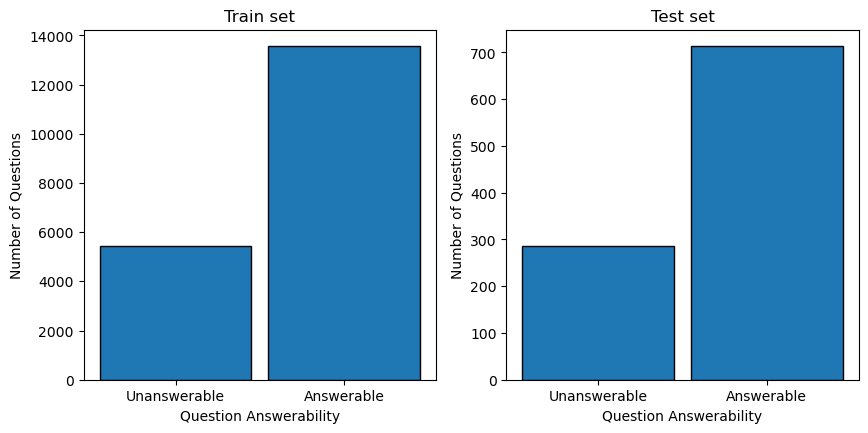

In [9]:
plt.figure(figsize=(10,10))
x = [d['answerable'] for d in train_data]
y = [d['answerable'] for d in test_data]
bins=[-0.5, 0.5, 1.5]
plt.subplot(2,2,1)
plt.xticks([0, 1], ['Unanswerable', 'Answerable'])
plt.xlabel('Question Answerability')
plt.ylabel('Number of Questions')
plt.title('Train set')
plt.hist(x,bins=bins,edgecolor="black",rwidth=0.9)
plt.subplot(2,2,2)
plt.xticks([0, 1], ['Unanswerable', 'Answerable'])
plt.xlabel('Question Answerability')
plt.ylabel('Number of Questions')
plt.title('Test set')
plt.hist(y,bins=bins,edgecolor="black",rwidth=0.9)

In [10]:
import matplotlib.pyplot as plt

# Assume that 'data' is a list of dictionaries containing the VizWiz dataset
confidence_levels = [d['answer_confidence'] for d in dataset ]

plt.hist(confidence_levels, bins=['yes', 'no', 'maybe'], edgecolor="black", rwidth=0.9, align='mid')
plt.xlabel('Answer Confidence')
plt.ylabel('Number of Answers')
plt.title('Histogram of Answer Confidence Levels in VizWiz Dataset')
plt.show()

KeyError: 'answer_confidence'

In [12]:
for i in range(0,len(dataset)):
    print(dataset[i])
    break
df = pd.DataFrame(dataset) 
#df['label'] = pd.DataFrame(labels)   
#df = pd.DataFrame(columns=["name", "age", "height"])

{'answerable': 1, 'image': 'VizWiz_train_000000000000.jpg', 'question': "What's the name of this product?", 'answer_type': 'other', 'answers': [{'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}]}


In [15]:
df=pd.json_normalize(dataset) 

,answerable,image,question,answer_type,answers
0,1,VizWiz_train_000000000000.jpg,What's the name of this product?,other,"[{'answer_confidence': 'yes', 'answer': 'basil..."
1,1,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,other,"[{'answer_confidence': 'yes', 'answer': 'soda'..."
2,1,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,other,"[{'answer_confidence': 'yes', 'answer': 'these..."
3,1,VizWiz_train_000000000003.jpg,What is the captcha on this screenshot?,other,"[{'answer_confidence': 'yes', 'answer': 't36m'..."
4,1,VizWiz_train_000000000004.jpg,What is this item?,other,"[{'answer_confidence': 'yes', 'answer': 'solar..."
...,...,...,...,...,...
19995,0,VizWiz_train_000000019995.jpg,"Wat is that, please?",unanswerable,"[{'answer_confidence': 'yes', 'answer': 'unsui..."
19996,0,VizWiz_train_000000019996.jpg,What brand of shoe is this?,unanswerable,"[{'answer_confidence': 'yes', 'answer': 'no br..."
19997,1,VizWiz_train_000000019997.jpg,What is this?,other,"[{'answer_confidence': 'maybe', 'answer': 'cla..."
19998,1,VizWiz_train_000000019998.jpg,What is this ?,other,"[{'answer_confidence': 'yes', 'answer': 'heads..."


In [ ]:
#######################################################################

In [6]:
def convert_to_csv(input, output):
    data = load_Data(input)
    keys = data[0].keys()
    with open(output, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

convert_to_csv('/kaggle/input/vizwiz/data/Annotations/train.json', 'output.csv')

In [ ]:
import csv
import torch
import torchvision.transforms as transforms
from PIL import Image
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the image pre-processing pipeline
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Open the CSV file containing the VizWiz dataset
with open('output.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)
    
    # Initialize the lists to hold the preprocessed data
    input_tensors = []
    
    # Loop through each row in the CSV file
    for row in csvreader:
        # Extract the image filename, question, and answers fields from the row
        image_filename = row['image']
        question = row['question']
        answers = [ans['answer'] for ans in row['answers']]
        
        # Preprocess the image data
        image = Image.open(image_filename)
        image_tensor = image_transforms(image)
        
        # Preprocess the question and answer data
        question_encoding = tokenizer(question, padding=True, truncation=True, return_tensors='pt')
        answer_encodings = tokenizer(answers, padding=True, truncation=True, return_tensors='pt')
        
        # Concatenate the preprocessed image and text data into a single input tensor
        input_tensor = torch.cat((image_tensor.unsqueeze(0), question_encoding['input_ids']), dim=1)
        
        # Append the input tensor to the list of preprocessed data
        input_tensors.append(input_tensor)
        
# Concatenate the preprocessed input tensors into a single tensor
input_tensor = torch.cat(input_tensors, dim=0)

In [ ]:
import csv
import torch
import torchvision.transforms as transforms
from PIL import Image
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the image pre-processing pipeline
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Open the CSV file containing the VizWiz dataset
with open('output.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)
    
    # Initialize the lists to hold the preprocessed data
    input_tensors = []
    
    # Loop through each row in the CSV file
    for row in csvreader:
        # Extract the image filename, question, and answers fields from the row
        image_filename = row['image']
        question = row['question']
        answers = [ans['answer'] for ans in row['answers']]
        answer_confidences = [ans['answer_confidence'] for ans in row['answers']]
        answer_types = [ans['answer_type'] for ans in row['answers']]
        answer_types_confidences = [ans['answer_type_confidence'] for ans in row['answers']]
        
        # Preprocess the image data
        image = Image.open(image_filename)
        image_tensor = image_transforms(image)
        
        # Preprocess the question and answer data
        question_encoding = tokenizer(question, padding=True, truncation=True, return_tensors='pt')
        answer_encodings = tokenizer(answers, padding=True, truncation=True, return_tensors='pt')
        answer_confidence_encodings = tokenizer(answer_confidences, padding=True, truncation=True, return_tensors='pt')
        answer_type_encodings = tokenizer(answer_types, padding=True, truncation=True, return_tensors='pt')
        answer_type_confidence_encodings = tokenizer(answer_types_confidences, padding=True, truncation=True, return_tensors='pt')
        
        # Concatenate the preprocessed image and text data into a single input tensor
        input_tensor = torch.cat((
            image_tensor.unsqueeze(0),
            question_encoding['input_ids'],
            answer_encodings['input_ids'],
            answer_confidence_encodings['input_ids'],
            answer_type_encodings['input_ids'],
            answer_type_confidence_encodings['input_ids']
        ), dim=1)
        
        # Append the input tensor to the list of preprocessed data
        input_tensors.append(input_tensor)
        
# Concatenate the preprocessed input tensors into a single tensor
input_tensor = torch.cat(input_tensors, dim=0)


In [8]:
image = Image.open("/kaggle/input/vizwiz/data/Images/VizWiz_test_000000020000.jpg")

# Display the image
image.show()

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmpeab623jb.PNG'


In [9]:
import os.path

image_path = '/kaggle/input/vizwiz/data/Images/._VizWiz_test_000000020000.jpg'

if os.path.isfile(image_path):
    print("File exists")
else:
    print("File does not exist")

File exists


In [10]:
from PIL import Image

try:
    image = Image.open(image_path)
    print("File is a valid image file")
except:
    print("File is not a valid image file")

File is not a valid image file


In [11]:
import imghdr

image_path = '/kaggle/input/vizwiz/data/Images/._VizWiz_test_000000020000.jpg'

if imghdr.what(image_path) is not None:
    print("File is a valid image file")
else:
    print("File is not a valid image file")

File is not a valid image file


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Used to change filepaths
from pathlib import Path
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
from PIL import Image
%matplotlib inline
import os
print(os.listdir("../input"))

['vizwiz']


In [14]:
IPython.display.Image(filename='/kaggle/input/vizwiz/data/Images/._VizWiz_test_000000020000.jpg') 